> **Tip:** in this report we will invetigate a data set for 10,000 movies which including the user rating and revenue.

# Project: Tmdb Movie Data
## Table Of Content:
<ul>
    <li><a href = "#intro">Introduction</a> </li>
    <li><a href = "#wrangling">Data Wrangling</a> </li>
    <li><a href = "#eda">EDA</a> </li>
    <li><a href = "#conclusions">Conclusions</a> </li>

</ul>

<a id='intro'></a>
# Introduction
- *welcome in this project we will try to use the different methods used in data analysis process and also the different packages*

### Questions
1. Which year has the highest release of movies?
2. Which Genre Has The Highest Release Of Movies?
3. Which genres are most popular from year to year?
4. Which movie made the highest revenue and lowest as well?
5. Which length movies most liked by the audiences according to their popularity?
6. How Does Popularity Depends On Profit?

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [68]:
df = pd.read_csv("tmdb-movies.csv")

In [69]:
df_cleaned = df.copy()

<a id='wrangling'></a>
# Data Wrangling



## Data Cleaning

### Define
- Release Year column Type is object so i need to convert it to date time

### Code


In [70]:
df_cleaned["release_date"] = pd.to_datetime(df_cleaned["release_date"])

### Test


In [71]:
df_cleaned["release_date"]

0       2015-06-09
1       2015-05-13
2       2015-03-18
3       2015-12-15
4       2015-04-01
           ...    
10861   2066-06-15
10862   2066-12-21
10863   2066-01-01
10864   2066-11-02
10865   2066-11-15
Name: release_date, Length: 10866, dtype: datetime64[ns]

### Define
- i think some columns are not necessary in my anlaysis so i will remove them like (imdb_id,overview,keywords)

### Code

In [72]:
df_cleaned.drop(["imdb_id","overview","keywords"], axis = 1, inplace = True)

### Test

In [73]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  int64         
 1   popularity            10866 non-null  float64       
 2   budget                10866 non-null  int64         
 3   revenue               10866 non-null  int64         
 4   original_title        10866 non-null  object        
 5   cast                  10790 non-null  object        
 6   homepage              2936 non-null   object        
 7   director              10822 non-null  object        
 8   tagline               8042 non-null   object        
 9   runtime               10866 non-null  int64         
 10  genres                10843 non-null  object        
 11  production_companies  9836 non-null   object        
 12  release_date          10866 non-null  datetime64[ns]
 13  vote_count      

### Define
- find and remove the duplicates in the dataframe

### Code

In [74]:
sum(df_cleaned.duplicated())

1

In [75]:
df_cleaned.drop_duplicates(inplace =True)

### Test

In [76]:
sum(df_cleaned.duplicated())

0

### Define
- i found that columns revenue and budget contain a lot of 0 values and also the column homepage contain alot of NaN values so i will drop these columns also beside the tagline coumn

### Code

In [77]:
df_cleaned.drop(['budget','revenue','homepage','tagline'],axis = 1, inplace = True)

In [78]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   popularity            10865 non-null  float64       
 2   original_title        10865 non-null  object        
 3   cast                  10789 non-null  object        
 4   director              10821 non-null  object        
 5   runtime               10865 non-null  int64         
 6   genres                10842 non-null  object        
 7   production_companies  9835 non-null   object        
 8   release_date          10865 non-null  datetime64[ns]
 9   vote_count            10865 non-null  int64         
 10  vote_average          10865 non-null  float64       
 11  release_year          10865 non-null  int64         
 12  budget_adj            10865 non-null  float64       
 13  revenue_adj     

### Define
- Find the rows with empty values and drop them

### Code

In [79]:
df_cleaned.isna().sum()

id                         0
popularity                 0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [80]:
df_cleaned.dropna(inplace = True)

### Test

In [81]:
df_cleaned.isna().sum()

id                      0
popularity              0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

### Define
- add the profit column which equal to revenue - budget

### Code

In [82]:
df_cleaned["profit"] = df_cleaned["revenue_adj"] - df_cleaned["budget_adj"]

### Test

In [83]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9772 non-null   int64         
 1   popularity            9772 non-null   float64       
 2   original_title        9772 non-null   object        
 3   cast                  9772 non-null   object        
 4   director              9772 non-null   object        
 5   runtime               9772 non-null   int64         
 6   genres                9772 non-null   object        
 7   production_companies  9772 non-null   object        
 8   release_date          9772 non-null   datetime64[ns]
 9   vote_count            9772 non-null   int64         
 10  vote_average          9772 non-null   float64       
 11  release_year          9772 non-null   int64         
 12  budget_adj            9772 non-null   float64       
 13  revenue_adj      

<a id='eda'></a>
# EDA (Exploratory Data Analysis)
>**Tip:** *in this part we will try to answer some questions within our data set*

In [84]:
df_cleaned.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,9772.000000,9772.000000,9772.000000,9772.000000,9772.000000,9772.000000,9.772000e+03,9.772000e+03,9.772000e+03
mean,63189.640810,0.694721,102.926627,239.312014,5.963528,2000.878428,1.941599e+07,5.705309e+07,3.763710e+07
std,90718.059987,1.036931,27.877432,603.011504,0.913174,13.036794,3.566634e+07,1.514499e+08,1.314756e+08
min,5.000000,0.000188,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08
25%,10221.500000,0.232710,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,18677.500000,0.419762,100.000000,46.000000,6.000000,2005.000000,3.061342e+05,0.000000e+00,0.000000e+00
75%,70577.250000,0.776408,112.000000,173.000000,6.600000,2011.000000,2.464268e+07,4.311848e+07,2.029698e+07
max,417859.000000,32.985763,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09


## Question1: (Which year has the highest release of movies?)
>**Tipe:** we found that 2014 is the most year of movies Release

In [85]:
highest_Release_year = df_cleaned.groupby('release_year').count()['id']

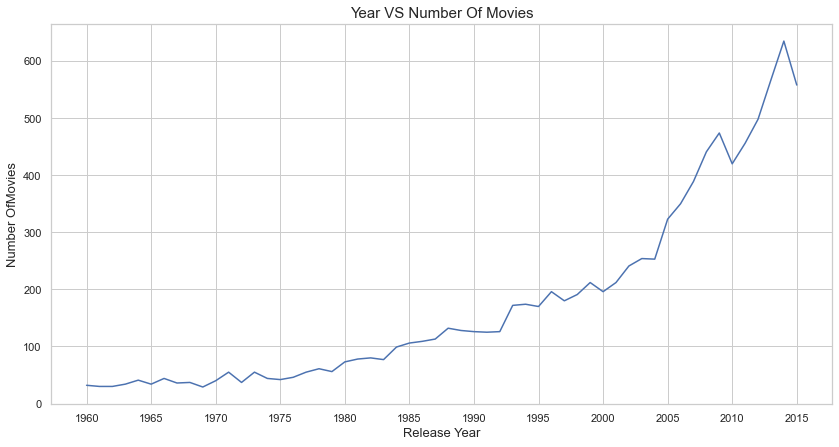

In [89]:
highest_Release_year.plot(xticks = np.arange(1960,2016,5))

sns.set(rc = {'figure.figsize': (12,7)})
plt.title("Year VS Number Of Movies", fontsize = 15)
plt.xlabel("Release Year", fontsize = 13)
plt.ylabel("Number OfMovies", fontsize = 13)

sns.set_style("whitegrid")


##### After Seeing the plot and the output we can conclude that year 2014 year has the highest release of movies (700) followed by year 2013 (659) and year 2015 (629).

## Question2:(what is the most profit movie?)
>**Tipe:** the most profit movie is "Star Wars".

In [90]:
most_profit = df_cleaned[df_cleaned["profit"] == df_cleaned["profit"].max()]

In [91]:
most_profit

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
1329,11,12.037933,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,4428,7.9,1977,3.957559e+07,2.789712e+09,2.750137e+09


## Question3: (what is the lowest profit movie?)
>**Tip:** the lowest profit movie is "The Warrior's Way" which actually lose.

In [92]:
lowest_profit = df_cleaned[df_cleaned["profit"] == df_cleaned["profit"].min()]

In [93]:
lowest_profit

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
2244,46528,0.25054,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74,6.4,2010,425000000.0,11087569.0,-413912431.0


## Question4: (Which Genre Has The Highest Release Of Movies?)
>**Tipe:** We see that Drama Has the highest release of movies.

In [94]:
def data(x):
    data_plot = df_cleaned[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    #conts each of the genre and return.
    info = data.value_counts(ascending=False)
    return info

In [95]:
total_genre_movies = data('genres')
print(total_genre_movies)

Drama              4364
Comedy             3433
Thriller           2746
Action             2235
Romance            1570
Horror             1526
Adventure          1384
Crime              1299
Science Fiction    1136
Family             1095
Fantasy             840
Mystery             773
Animation           617
Music               339
Documentary         317
History             306
War                 258
Western             160
TV Movie            132
Foreign             120
dtype: int64


Text(0, 0.5, 'Number Of Movies')

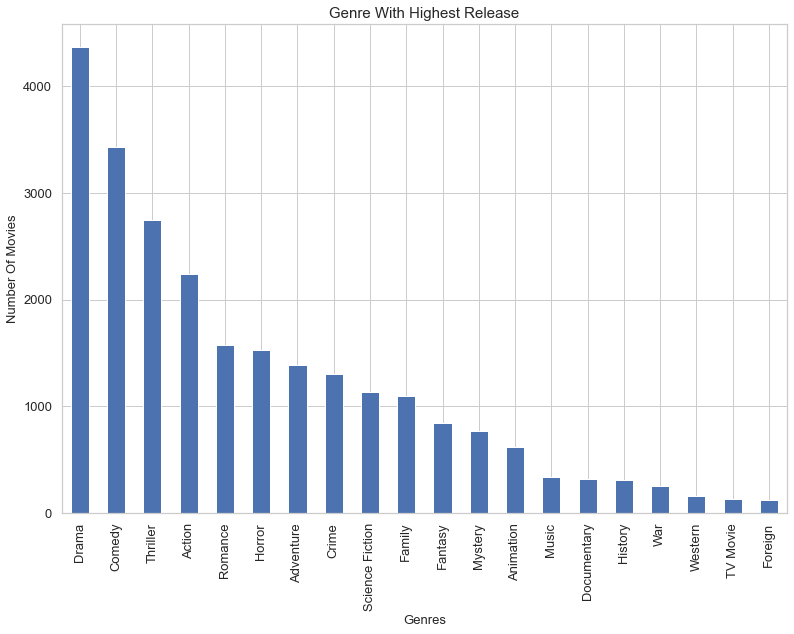

In [96]:
total_genre_movies.plot(kind= "bar",figsize= (13,9),fontsize = 13)
plt.title("Genre With Highest Release",fontsize=15)
plt.xlabel('Genres',fontsize=13)
plt.ylabel("Number Of Movies",fontsize= 13)

#### According to the plot Drama(4761) genre has the highest release of movies followed by Comedy(3793) and Thriller(2908).

## Question5: (Which length movies most liked by the audiences according to their popularity?)
>**Tip:** we found that the movies in the range of 100-200 runtime are more popular than other runtime movies.

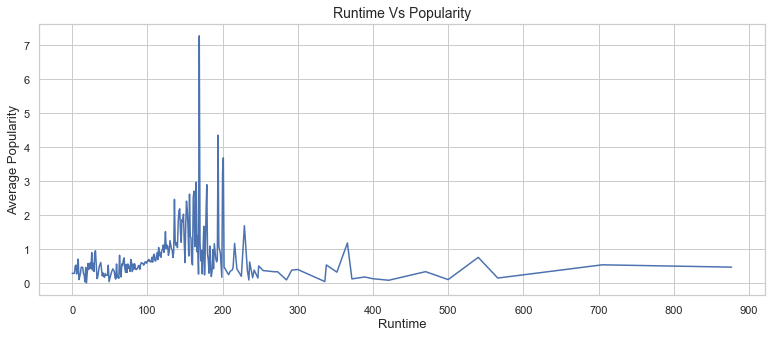

In [97]:
df_cleaned.groupby('runtime')['popularity'].mean().plot(figsize = (13,5),xticks=np.arange(0,1000,100))

#setup the title of the figure
plt.title("Runtime Vs Popularity",fontsize = 14)
plt.xlabel('Runtime',fontsize = 13)
plt.ylabel('Average Popularity',fontsize = 13)
#setup the figure size.
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style("whitegrid")

#### According to the plot we can say that movies in the range of 100-200 runtime are more popular than other runtime movies. Because it is boring to see the long duration movies.

## Question6:(How Does Popularity Depends On Profit?)

Correlation Between Popularity And Profit :  0.561496439758401


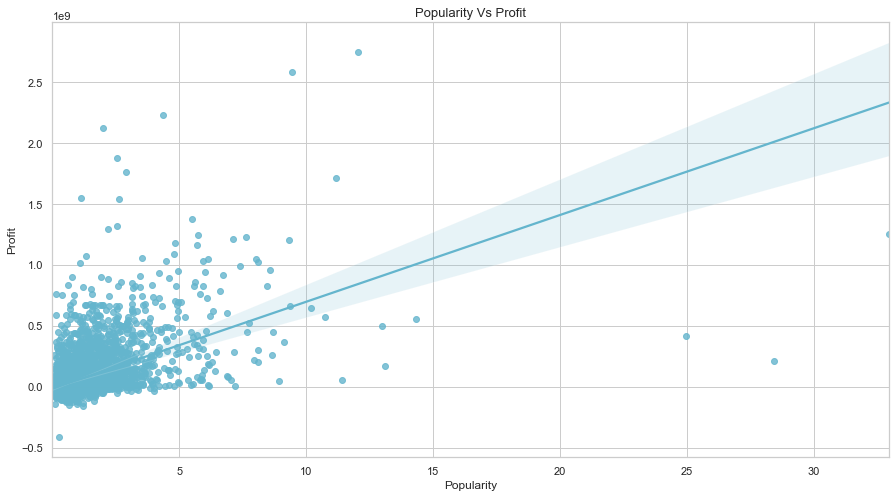

In [98]:


ax = sns.regplot(x=df_cleaned['popularity'],y=df_cleaned['profit'],color='c')

#setup the title and the labels of the scatter plot.
ax.set_title("Popularity Vs Profit",fontsize=13)
ax.set_xlabel("Popularity",fontsize=12)
ax.set_ylabel("Profit",fontsize=12)

#setup the figure size.
sns.set(rc={'figure.figsize':(9,5)})
sns.set_style("whitegrid")

#find the correlation between them.
data_corr = df_cleaned.corr()

print("Correlation Between Popularity And Profit : ",data_corr.loc['popularity','profit'])

#### as we see Popularity and profit have positive correlation(0.61). It means that movie with high popularity tends to earn high profit.

# Conclusions

1. year 2014 year has the highest release of movies (700) followed by year 2013 (659) and year 2015 (629).
2. Drame, Comedy, Thriller and Action are four most-made genres.
3. 'Star Wars' movie earn the highest profit in all in this dataset.And the most in loss movie in this dataset is The Warrior's Way.
4. we can say that movies in the range of 100-200 runtime are more popular than other runtime movies. Because - it is boring to see the long duration movies.
5. movie with high popularity tends to earn high profit.

## Limitations:
the budget and revenue column do not have currency unit, it might be possible different movies have budget in different currency according to the country they are produce in. So a disparity arises here which can state the complete analysis wrong. i want to Drop the rows with missing values but it will affecte the overall analysis.During the data cleaning process, I split the data seperated by '|' into lists for easy parsing during the exploration phase. This increases the time taken in calculating the result.